In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize


In [47]:
data = pd.read_csv("1) iris.csv")
print(data)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [48]:
le = LabelEncoder()   #encode target
data['species_enc'] = le.fit_transform(data['species'])
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species_enc']

In [49]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [50]:
scaler = StandardScaler()
X_train_sca = scaler.fit_transform(X_train)
X_test_sca = scaler.transform(X_test)

In [51]:
dt = DecisionTreeClassifier(random_state=42) #Decision Tree
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.80      0.89        15
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [52]:
lr = LogisticRegression(max_iter=300, random_state=42) #Logistic Regression
lr.fit(X_train_sca, y_train)
y_pred_lr = lr.predict(X_test_sca)
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_lr))



Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [53]:
rf = RandomForestClassifier(n_estimators=200, random_state=42) #Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [54]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2]) #ROC-AUC for multi class 
print(f"\nROC AUC Score (DT): {roc_auc_score(y_test_bin, dt.predict_proba(X_test), multi_class='ovr'):.4f}")
print(f"ROC AUC Score (LR): {roc_auc_score(y_test_bin, lr.predict_proba(X_test_sca ), multi_class='ovr'):.4f}")
print(f"ROC AUC Score (RF): {roc_auc_score(y_test_bin, rf.predict_proba(X_test), multi_class='ovr'):.4f}")


ROC AUC Score (DT): 0.9500
ROC AUC Score (LR): 0.9956
ROC AUC Score (RF): 0.9874


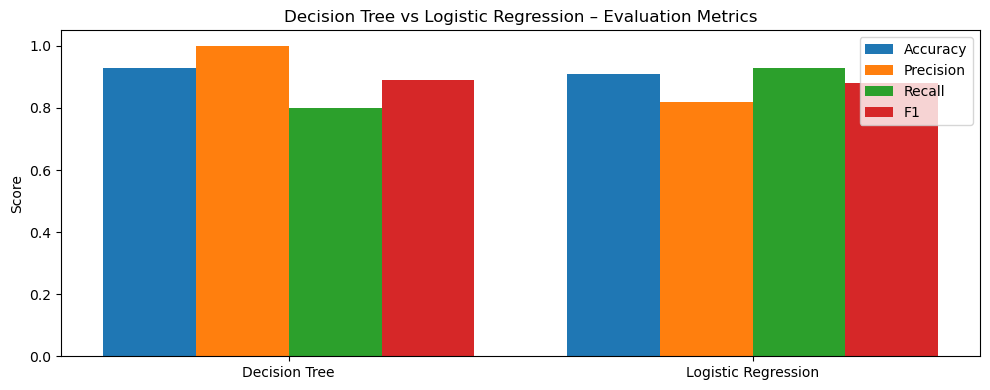

In [58]:
labels = ['Decision Tree', 'Logistic Regression']
   #results to visualization 
accuracy    = [0.93, 0.91]  
precision   = [1.00, 0.82]  
recall      = [0.80, 0.93]
f1          = [0.89, 0.88]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
results = [accuracy, precision, recall, f1]

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 4))
for i, metric in enumerate(metrics):
    ax.bar(x + i*width, results[i], width, label=metric)

ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(labels)
ax.set_ylabel('Score')
ax.set_title('Decision Tree vs Logistic Regression – Evaluation Metrics')
ax.legend()
plt.tight_layout()
plt.show()